In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
print("Tentando baixar 'punkt_tab'...")
nltk.download('punkt_tab')
print("Tentando baixar 'stopwords'...")
nltk.download('stopwords')

# download do NLTK (só na primeira vez)
nltk.download('punkt')
nltk.download('stopwords')

Tentando baixar 'punkt_tab'...
Tentando baixar 'stopwords'...


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# configs gerais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 1. CARREGAR E ENTENDER OS DADOS

In [18]:
print("Carregando dataset completo em partes...")
chunksize = 100000  # Processar em lotes de 100.000 linhas
data_chunks = []
for chunk in pd.read_csv('complaints.csv', chunksize=chunksize):
    chunk = chunk.dropna()
    data_chunks.append(chunk)
data = pd.concat(data_chunks, ignore_index=True)

Carregando dataset completo em partes...


In [19]:
print("Primeiras 5 linhas do dataset:")
print(data.head())

Primeiras 5 linhas do dataset:
   Unnamed: 0         product_5  \
0         234  Credit Reporting   
1         240   Debt Collection   
2         257  Credit Reporting   
3         271  Credit Reporting   
4         279  Credit Reporting   

                                           narrative  \
0  Dear Possible Financial Inc you guyss aree rep...   
1  XXXX XXXX XXXX ( debt collector ), sent my boy...   
2  I been receiving alerts my information was fou...   
3  Subject : Dispute of Inaccurate Information on...   
4  Do you believe your company owns the promissor...   

                                             Product Date received  \
0  Credit reporting or other personal consumer re...    2024-07-27   
1                                    Debt collection    2024-07-27   
2  Credit reporting or other personal consumer re...    2024-07-23   
3  Credit reporting or other personal consumer re...    2024-07-27   
4  Credit reporting or other personal consumer re...    2024-07-26   



In [20]:
print("\nInformações do dataset:")
print(data.info())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757155 entries, 0 to 1757154
Data columns (total 11 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Unnamed: 0        int64 
 1   product_5         object
 2   narrative         object
 3   Product           object
 4   Date received     object
 5   Sub-product       object
 6   Issue             object
 7   Sub-issue         object
 8   Company           object
 9   State             object
 10  Timely response?  object
dtypes: int64(1), object(10)
memory usage: 147.5+ MB
None


#### Características


In [21]:
print("- Origem: Consumer Financial Protection Bureau (CFPB), EUA.")
data["Date received"] = pd.to_datetime(data["Date received"])
print(f"- Periodo: de {data['Date received'].min()} a {data['Date received'].max()}")
print("- Gênero: Reclamações textuais de consumidores sobre serviços financeiros.")
print("- Língua: Inglês.")
print("- Anotação: Rótulos ('Product') atribuídos pelos consumidores ao submeter reclamações.")
print(f"- Total de reclamações: {len(data)}")
print(f"- Colunas disponíveis: {list(data.columns)}")
print(f"\nTotal de reclamações: {len(data)}")

- Origem: Consumer Financial Protection Bureau (CFPB), EUA.
- Periodo: de 2015-03-19 00:00:00 a 2024-07-31 00:00:00
- Gênero: Reclamações textuais de consumidores sobre serviços financeiros.
- Língua: Inglês.
- Anotação: Rótulos ('Product') atribuídos pelos consumidores ao submeter reclamações.
- Total de reclamações: 1757155
- Colunas disponíveis: ['Unnamed: 0', 'product_5', 'narrative', 'Product', 'Date received', 'Sub-product', 'Issue', 'Sub-issue', 'Company', 'State', 'Timely response?']

Total de reclamações: 1757155


# 2. ANÁLISE EXPLORATÓRIA DOS DADOS (EDA)


### Distribuição das Classes (Produtos) ###
product_5
Credit Reporting              1160112
Debt Collection                266514
Credit Card Services           140699
Bank Accounts and Services      99530
Loans                           90300
Name: count, dtype: int64
product_5
Credit Reporting              0.660222
Debt Collection               0.151674
Credit Card Services          0.080072
Bank Accounts and Services    0.056643
Loans                         0.051390
Name: count, dtype: float64


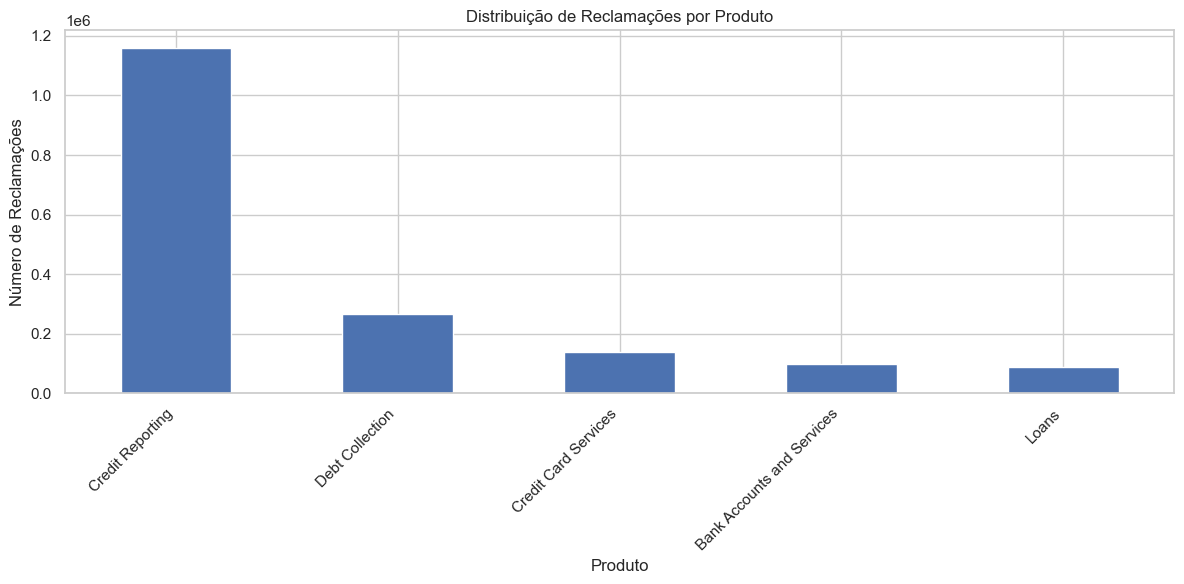

In [22]:
# a) Distribuição de classes
print("\n### Distribuição das Classes (Produtos) ###")
class_counts = data["product_5"].value_counts()
print(class_counts)
print(class_counts / len(data))  # Proporção, como no Notebook 2

# Gráfico de barras (como no Notebook 2)
plt.figure()
class_counts.plot(kind="bar")
plt.title("Distribuição de Reclamações por Produto")
plt.xlabel("Produto")
plt.ylabel("Número de Reclamações")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

